In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, timedelta 

In [18]:
# Load the data from the data folder  for forex (/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv) and commodity (/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodity/XAUUSD_D1.csv)

eurusd_D1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv')
#eurusd_h1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_H1.csv')
#eurusd_m15 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_M15.csv')

xauusd_D1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_D1.csv')
#xauusd_h1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_H1.csv')
#xauusd_m15 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_M15.csv')

In [19]:
import pandas as pd

def clean_trading_data_corrected(file_path):
    """
    Correctly reads and cleans the data by specifying all column names
    and correctly parsing the Time index.
    """
    try:
        # Define the headers for all 7 columns.
        column_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Spread']
        
        # Read the CSV, skipping the original malformed header row (header=0)
        # and applying our defined names.
        # We also set 'Time' as the index and parse its dates immediately.
        df = pd.read_csv(
            file_path, 
            sep='\t', 
            header=0, 
            names=column_names, 
            index_col='Time', 
            parse_dates=True
        )

        # Convert numeric columns to ensure correct data types.
        numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Spread']
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop rows that might have missing values.
        df.dropna(inplace=True)
        
        # Sort by time index, which is good practice.
        df.sort_index(inplace=True)

        print("Data cleaning completed successfully.")
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

eurusd_D1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv')
#eurusd_H1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_H1.csv')
#eurusd_M15_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_M15.csv')

xauusd_D1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_D1.csv')
#xauusd_H1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_H1.csv')
#xauusd_M15_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_M15.csv')


Data cleaning completed successfully.
Data cleaning completed successfully.


✓ Technical indicators (SMA, EMA, MACD, RSI) added.
✓ Technical indicators (SMA, EMA, MACD, RSI) added.

EUR/USD data with indicators (tail):
               Open     High      Low    Close  Volume  Spread    SMA_50  \
Time                                                                       
2025-08-28  1.16474  1.16972  1.16289  1.16785   86929       3  1.166407   
2025-08-29  1.16786  1.17089  1.16507  1.16826   88930       4  1.166175   
2025-08-31  1.16935  1.16959  1.16845  1.16900    2233      37  1.166017   
2025-09-01  1.16899  1.17362  1.16879  1.17147   54366       4  1.165903   
2025-09-02  1.17148  1.17156  1.16127  1.16623  128436       4  1.165668   

             SMA_200    EMA_12    EMA_26      MACD  MACD_Signal        RSI  
Time                                                                        
2025-08-28  1.114133  1.165846  1.165290  0.000556     0.000641  50.094197  
2025-08-29  1.114818  1.166217  1.165510  0.000707     0.000654  47.062350  
2025-08-31  1.115

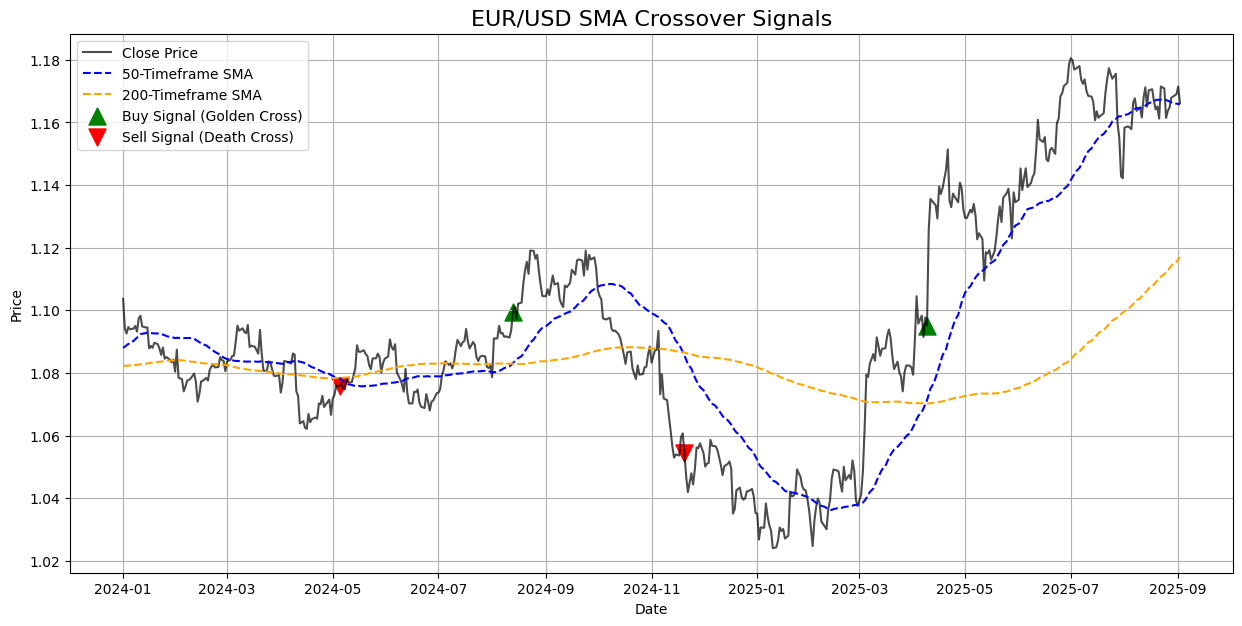

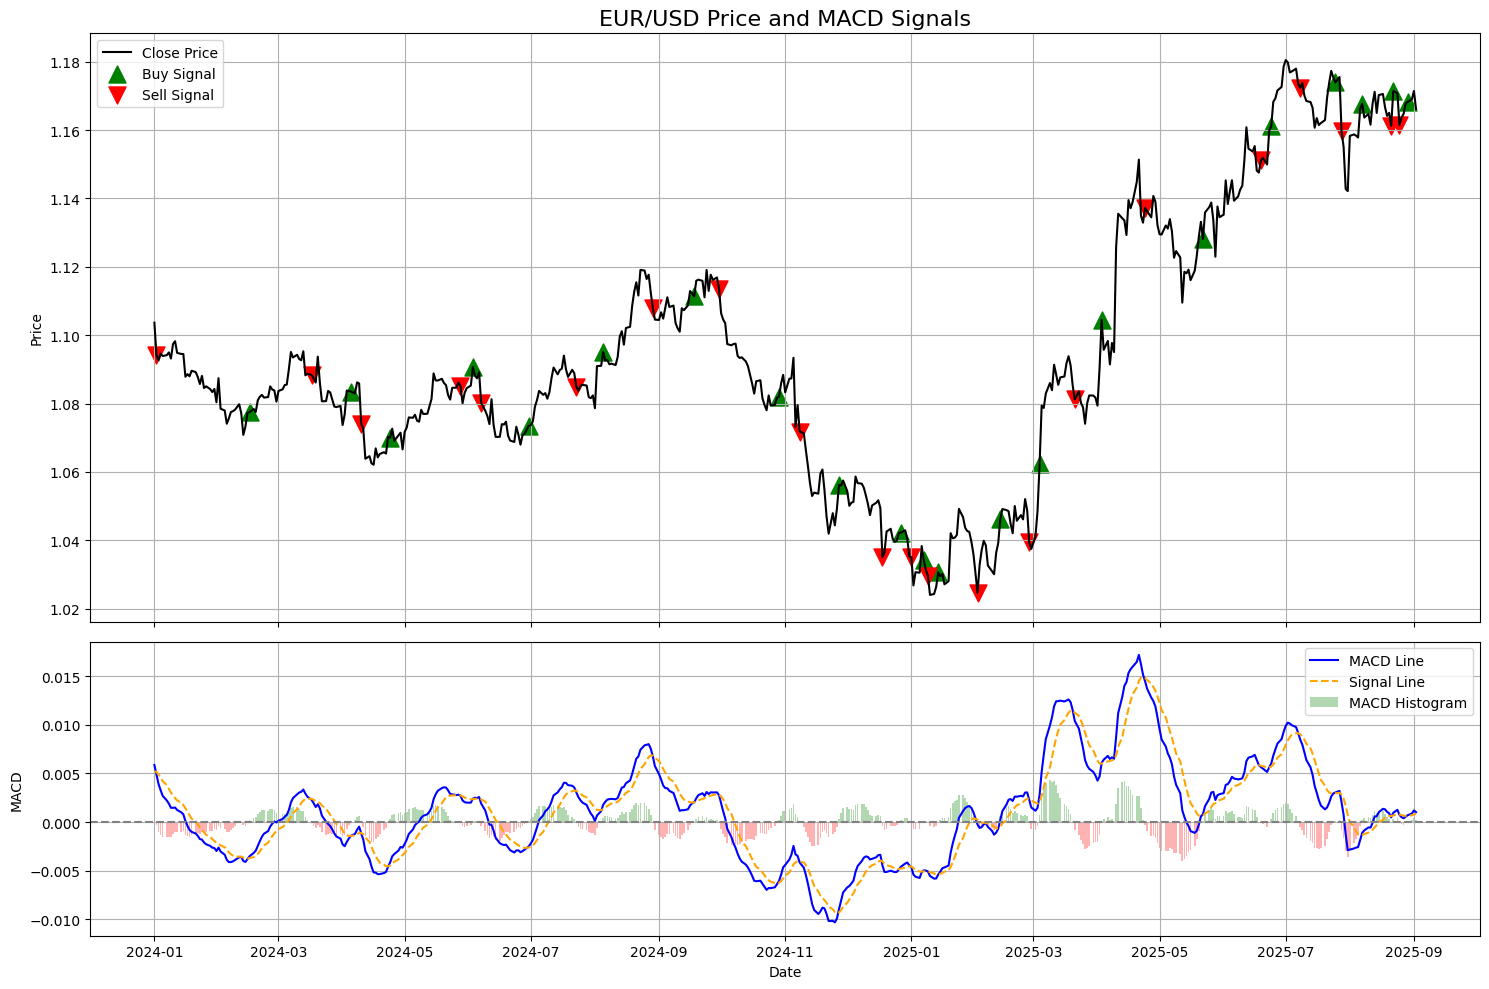

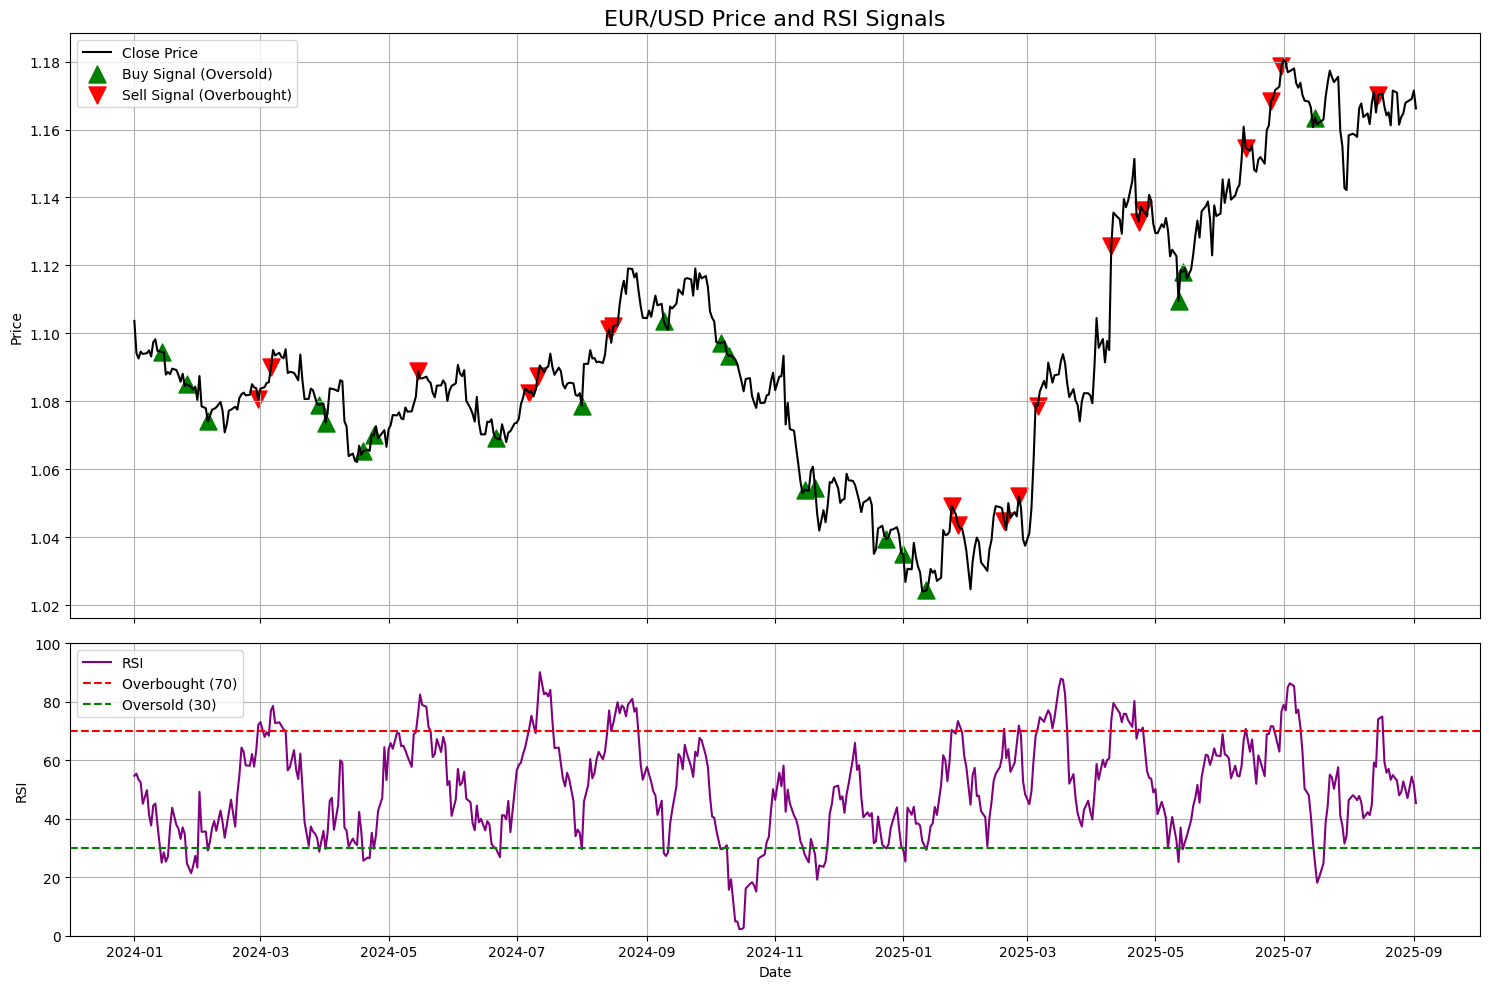


--- Visualizing Signals on XAU/USD Data ---


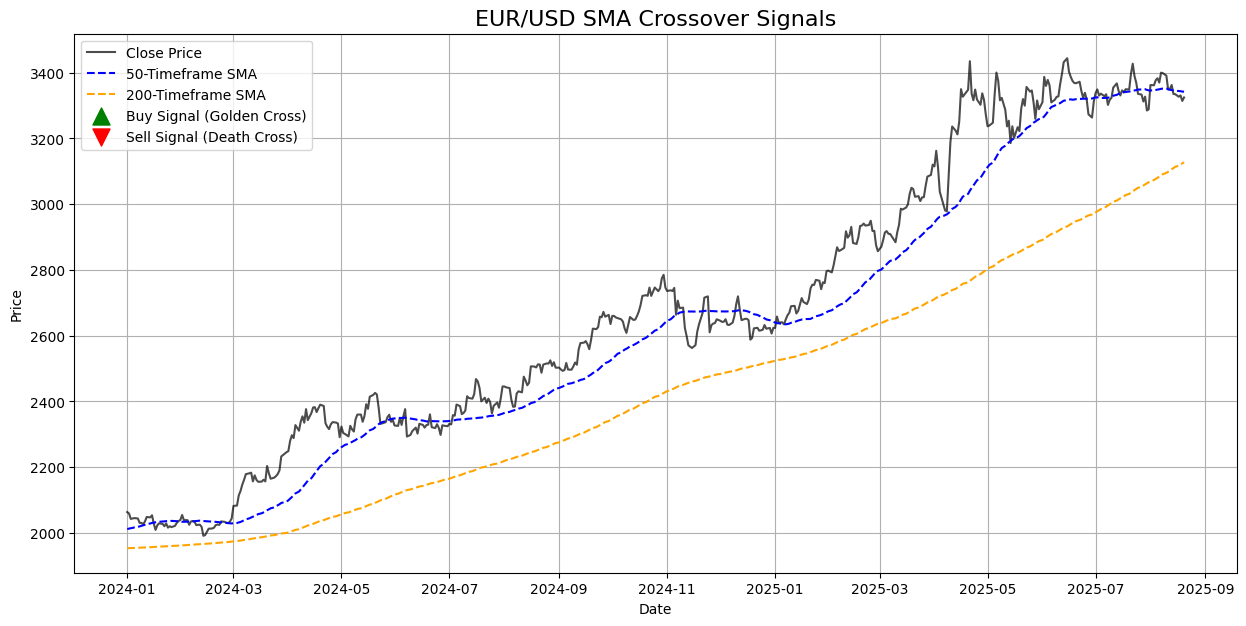

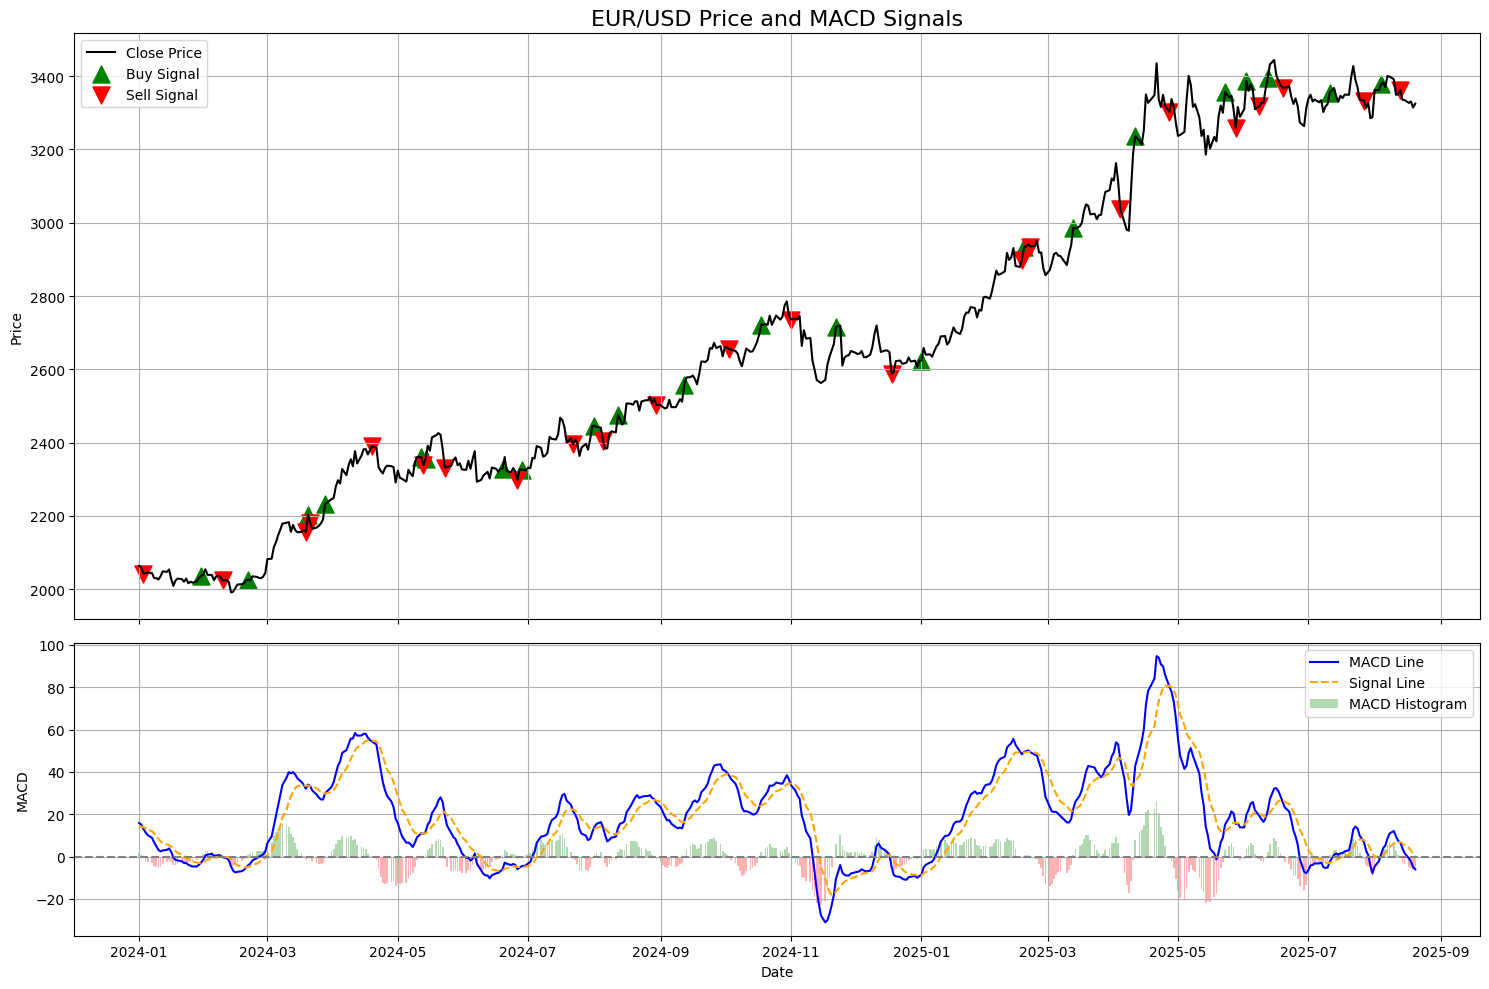

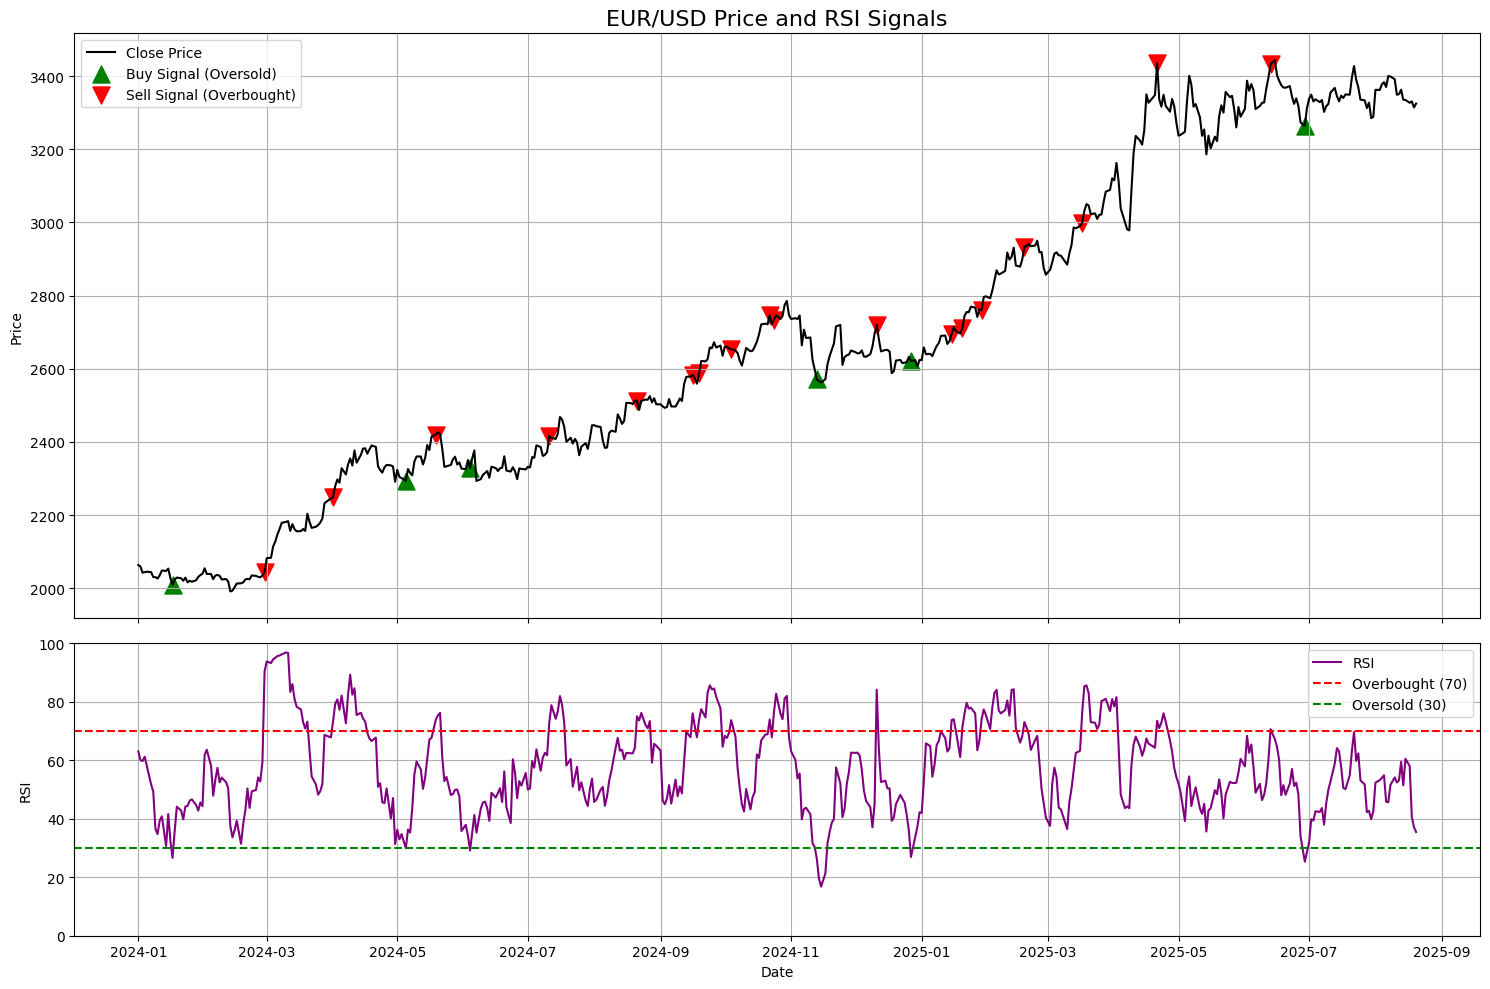

In [20]:
# =============================================================================
#
#       Phase 2: Indicators & Signals
#
# =============================================================================
#
# ---
# ### **Objective:**
# This script implements standard trading indicators, generates signals based on
# their values, and visualizes these signals on historical price data. This
# forms the core logic for the automated trading strategy.
# ---

# Assuming 'eurusd_D1_df' and 'xauusd_D1_df' are pre-loaded and cleaned
# from the previous steps provided in the context.

# Let's ensure the required libraries are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we have the cleaned EUR/USD DataFrame from your code.
# If not, we would run the cleaning function first.
# eurusd_D1_df = clean_trading_data_corrected('path/to/your/EURUSD_D1.csv')


# =============================================================================
# Task 2.1: Implement SMA, EMA, RSI, MACD
# =============================================================================

def add_technical_indicators(df):
    """
    Calculates and adds SMA, EMA, RSI, and MACD to the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame with a 'Close' price column.

    Returns:
    pd.DataFrame: DataFrame with new columns for each indicator.
    """
    df_with_indicators = df.copy()

    # 1. Simple Moving Average (SMA)
    df_with_indicators['SMA_50'] = df_with_indicators['Close'].rolling(window=50).mean()
    df_with_indicators['SMA_200'] = df_with_indicators['Close'].rolling(window=200).mean()

    # 2. Exponential Moving Average (EMA)
    df_with_indicators['EMA_12'] = df_with_indicators['Close'].ewm(span=12, adjust=False).mean()
    df_with_indicators['EMA_26'] = df_with_indicators['Close'].ewm(span=26, adjust=False).mean()

    # 3. Moving Average Convergence Divergence (MACD)
    df_with_indicators['MACD'] = df_with_indicators['EMA_12'] - df_with_indicators['EMA_26']
    df_with_indicators['MACD_Signal'] = df_with_indicators['MACD'].ewm(span=9, adjust=False).mean()

    # 4. Relative Strength Index (RSI)
    delta = df_with_indicators['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    
    rs = avg_gain / avg_loss
    df_with_indicators['RSI'] = 100 - (100 / (1 + rs))

    print("✓ Technical indicators (SMA, EMA, MACD, RSI) added.")
    return df_with_indicators

# Apply the function to our datasets
eurusd_D1_indicators = add_technical_indicators(eurusd_D1_df)
# xauusd_D1_indicators = add_technical_indicators(xauusd_D1_df) # Can be used for Gold
xauusd_D1_indicators = add_technical_indicators(xauusd_D1_df)

print("\nEUR/USD data with indicators (tail):")
print(eurusd_D1_indicators.tail())


# =============================================================================
# Task 2.2: Build Simple Crossover Signals
# =============================================================================

def generate_trading_signals(df):
    """
    Generates trading signals based on indicator crossovers.

    - SMA Crossover: Golden Cross (SMA50 > SMA200) / Death Cross (SMA50 < SMA200)
    - MACD Crossover: MACD line crosses above/below signal line
    - RSI Oversold/Overbought: RSI crosses below 30 or above 70

    Returns:
    pd.DataFrame: DataFrame with new columns for signals.
    """
    df_with_signals = df.copy()
    
    # --- 1. SMA Crossover Signal ---
    # Signal is 1 if SMA_50 > SMA_200 (Golden Cross), -1 if not (Death Cross)
    df_with_signals['SMA_Signal'] = np.where(df_with_signals['SMA_50'] > df_with_signals['SMA_200'], 1, -1)
    
    # --- 2. MACD Crossover Signal ---
    # Signal is 1 if MACD > Signal Line, -1 if not
    df_with_signals['MACD_Signal_Crossover'] = np.where(df_with_signals['MACD'] > df_with_signals['MACD_Signal'], 1, -1)
    
    # --- 3. RSI Signal ---
    # Signal is 1 (Buy) if RSI < 30 (Oversold), -1 (Sell) if RSI > 70 (Overbought), 0 otherwise
    df_with_signals['RSI_Signal'] = np.where(df_with_signals['RSI'] < 30, 1,
                                            np.where(df_with_signals['RSI'] > 70, -1, 0))

    print("\n✓ Trading signals (SMA, MACD, RSI) generated.")
    return df_with_signals

# Apply the signal generation function
eurusd_D1_signals = generate_trading_signals(eurusd_D1_indicators)
xauusd_D1_signals = generate_trading_signals(xauusd_D1_indicators)

print("\nEUR/USD data with signals (tail):")
# Display relevant columns to check signals
print(eurusd_D1_signals[['Close', 'SMA_50', 'SMA_200', 'SMA_Signal', 'MACD', 'MACD_Signal', 'MACD_Signal_Crossover', 'RSI', 'RSI_Signal']].tail(10))


# =============================================================================
# Task 2.3 & 2.4: Test Signals on Sample Data & Document Signal Behavior
# =============================================================================
#
# ---
# ### **Documentation:**
# This section visualizes the signals to document their behavior. Each plot
# shows the price, the relevant indicators, and marks the exact points where
# 'Buy' (green triangle) or 'Sell' (red triangle) signals are generated.
# ---

def plot_sma_crossover_signals(df, start_date="2024-01-01"):
    """Visualizes SMA Golden/Death Cross signals."""
    subset = df[df.index >= start_date].copy()
    
    # Find the exact crossover points
    subset['SMA_Crossover'] = subset['SMA_Signal'].diff()
    buy_signals = subset[subset['SMA_Crossover'] > 0]
    sell_signals = subset[subset['SMA_Crossover'] < 0]
    
    plt.figure(figsize=(15, 7))
    plt.plot(subset.index, subset['Close'], label='Close Price', color='black', alpha=0.7)
    plt.plot(subset.index, subset['SMA_50'], label='50-Timeframe SMA', color='blue', linestyle='--')
    plt.plot(subset.index, subset['SMA_200'], label='200-Timeframe SMA', color='orange', linestyle='--')
    
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=150, label='Buy Signal (Golden Cross)')
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=150, label='Sell Signal (Death Cross)')
    
    plt.title('EUR/USD SMA Crossover Signals', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_macd_crossover_signals(df, start_date="2024-01-01"):
    """Visualizes MACD Crossover signals."""
    subset = df[df.index >= start_date].copy()
    
    # Find exact crossover points
    subset['MACD_Crossover'] = subset['MACD_Signal_Crossover'].diff()
    buy_signals = subset[subset['MACD_Crossover'] > 0]
    sell_signals = subset[subset['MACD_Crossover'] < 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    
    # Price chart with signals
    ax1.plot(subset.index, subset['Close'], label='Close Price', color='black')
    ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=150, label='Buy Signal')
    ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=150, label='Sell Signal')
    ax1.set_title('EUR/USD Price and MACD Signals', fontsize=16)
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)
    
    # MACD chart
    ax2.plot(subset.index, subset['MACD'], label='MACD Line', color='blue')
    ax2.plot(subset.index, subset['MACD_Signal'], label='Signal Line', color='orange', linestyle='--')
    ax2.bar(subset.index, subset['MACD'] - subset['MACD_Signal'], label='MACD Histogram', color=np.where((subset['MACD'] - subset['MACD_Signal']) > 0, 'g', 'r'), alpha=0.3)
    ax2.set_ylabel('MACD')
    ax2.axhline(0, color='grey', linestyle='--')
    ax2.legend()
    ax2.grid(True)
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

def plot_rsi_signals(df, start_date="2024-01-01"):
    """Visualizes RSI Oversold/Overbought signals."""
    subset = df[df.index >= start_date].copy()

    # Find points where RSI crosses the thresholds
    buy_signals = subset[(subset['RSI_Signal'] == 1) & (subset['RSI_Signal'].shift(1) == 0)]
    sell_signals = subset[(subset['RSI_Signal'] == -1) & (subset['RSI_Signal'].shift(1) == 0)]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Price chart with signals
    ax1.plot(subset.index, subset['Close'], label='Close Price', color='black')
    ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=150, label='Buy Signal (Oversold)')
    ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=150, label='Sell Signal (Overbought)')
    ax1.set_title('EUR/USD Price and RSI Signals', fontsize=16)
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # RSI chart
    ax2.plot(subset.index, subset['RSI'], label='RSI', color='purple')
    ax2.axhline(70, linestyle='--', color='red', label='Overbought (70)')
    ax2.axhline(30, linestyle='--', color='green', label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.set_ylim(0, 100)
    ax2.legend()
    ax2.grid(True)
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

# --- Execute Visualization ---
print("\n--- Visualizing Signals on EUR/USD Data ---")

# 1. Plot SMA Crossover signals for a longer timeframe to see trend changes
plot_sma_crossover_signals(eurusd_D1_signals, start_date="2024-01-01")

# 2. Plot MACD signals for a more recent period to see shorter-term signals
plot_macd_crossover_signals(eurusd_D1_signals, start_date="2024-01-01")

# 3. Plot RSI signals for a recent period
plot_rsi_signals(eurusd_D1_signals, start_date="2024-01-01")

# --- Execute Visualization ---
print("\n--- Visualizing Signals on XAU/USD Data ---")

# 1. Plot SMA Crossover signals for a longer timeframe to see trend changes
plot_sma_crossover_signals(xauusd_D1_signals, start_date="2024-01-01")

# 2. Plot MACD signals for a more recent period to see shorter-term signals
plot_macd_crossover_signals(xauusd_D1_signals, start_date="2024-01-01")

# 3. Plot RSI signals for a recent period
plot_rsi_signals(xauusd_D1_signals, start_date="2024-01-01")

### Timeframe: 1H

Data cleaning completed successfully.
Data cleaning completed successfully.
✓ Technical indicators (SMA, EMA, MACD, RSI) added.
✓ Technical indicators (SMA, EMA, MACD, RSI) added.

✓ Trading signals (SMA, MACD, RSI) generated.

✓ Trading signals (SMA, MACD, RSI) generated.

--- Visualizing Signals on XAU/USD Data ---


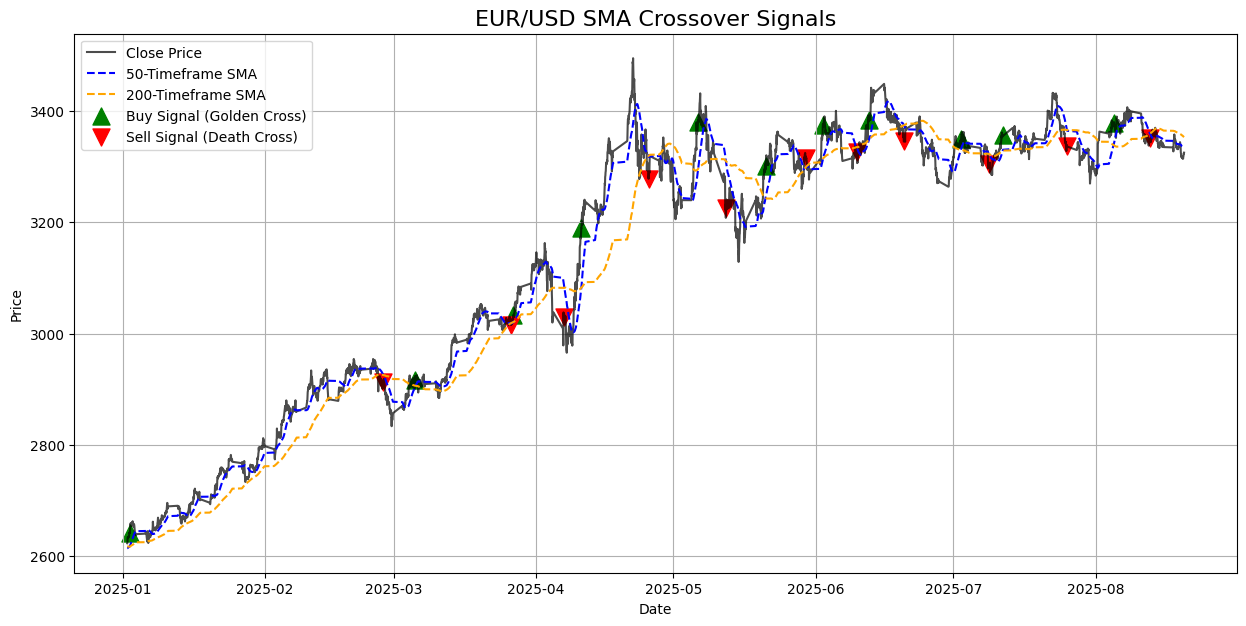

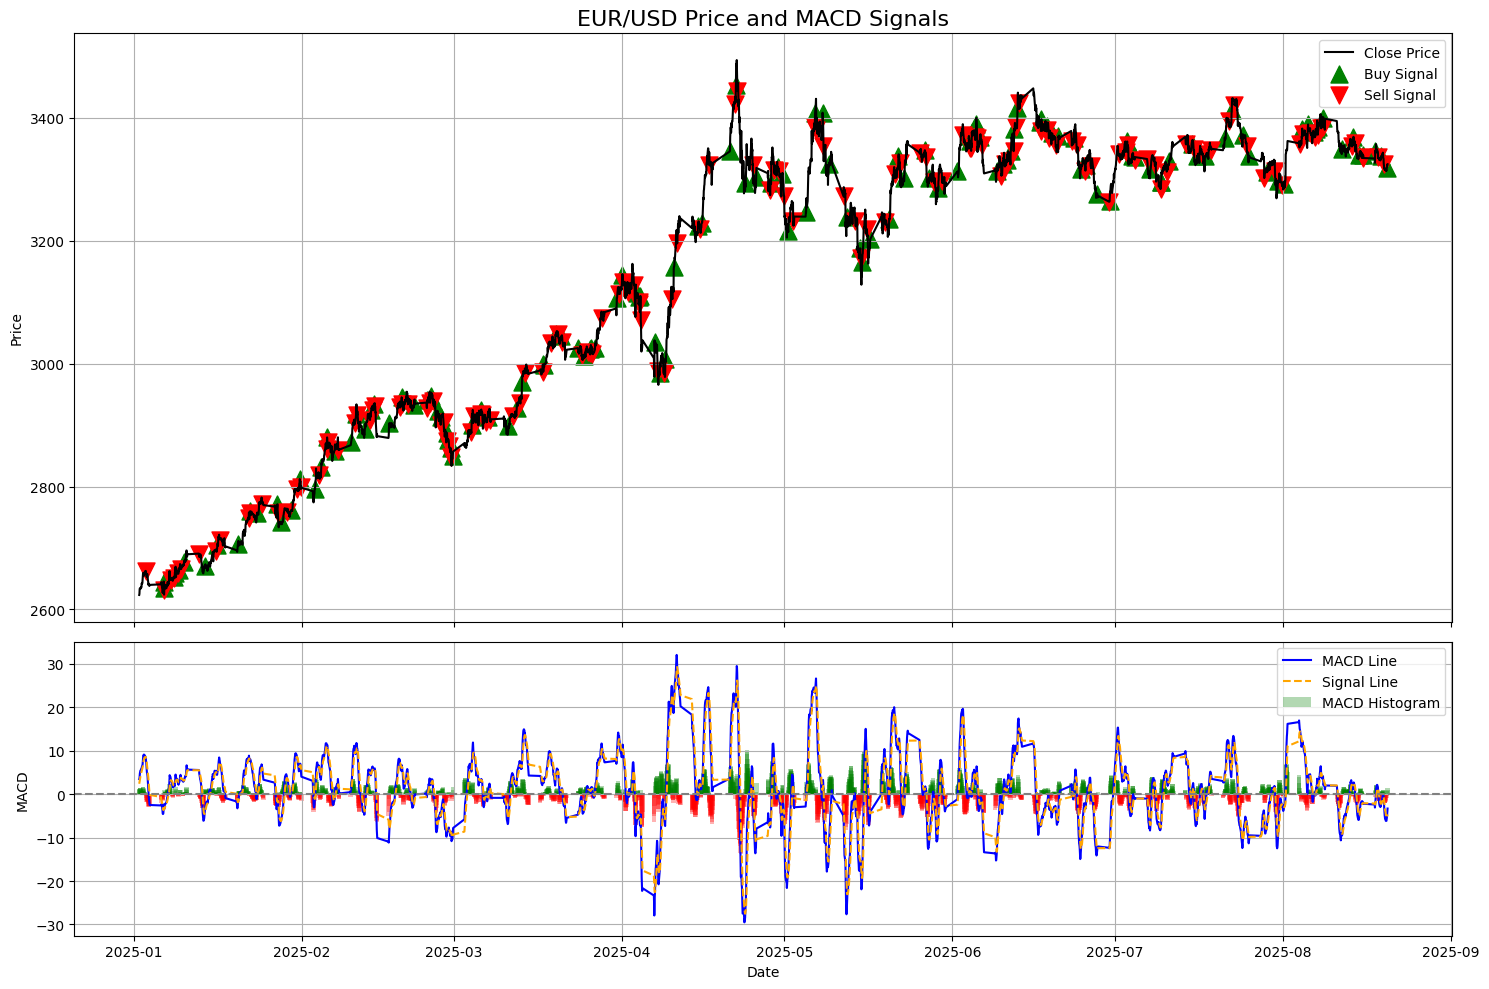

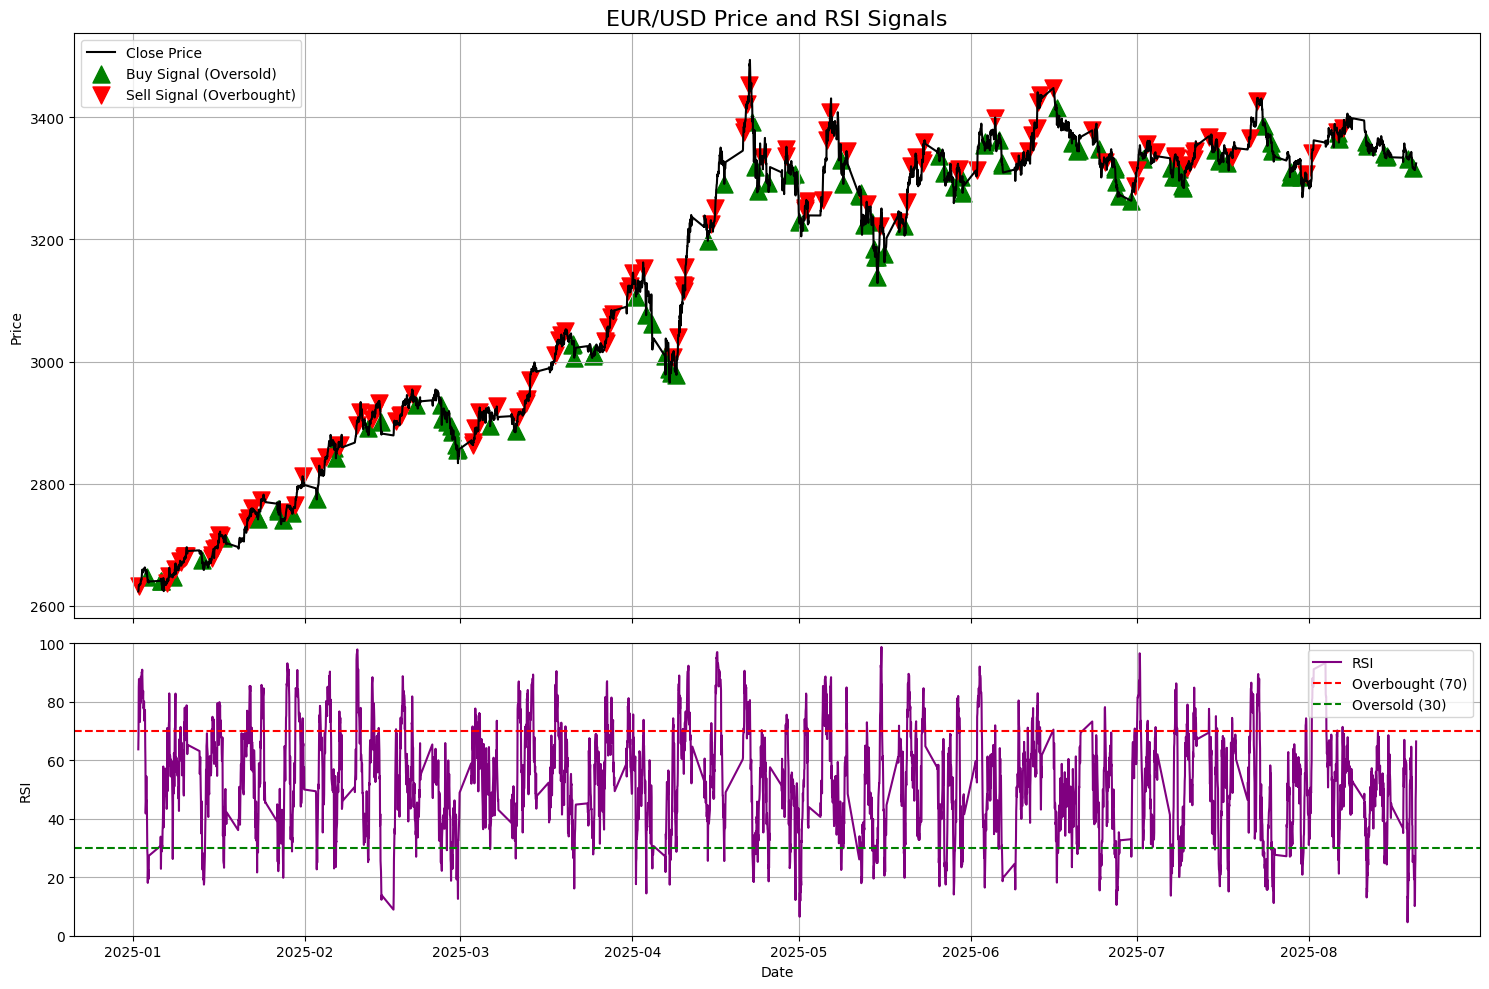


--- Visualizing Signals on XAU/USD Data ---


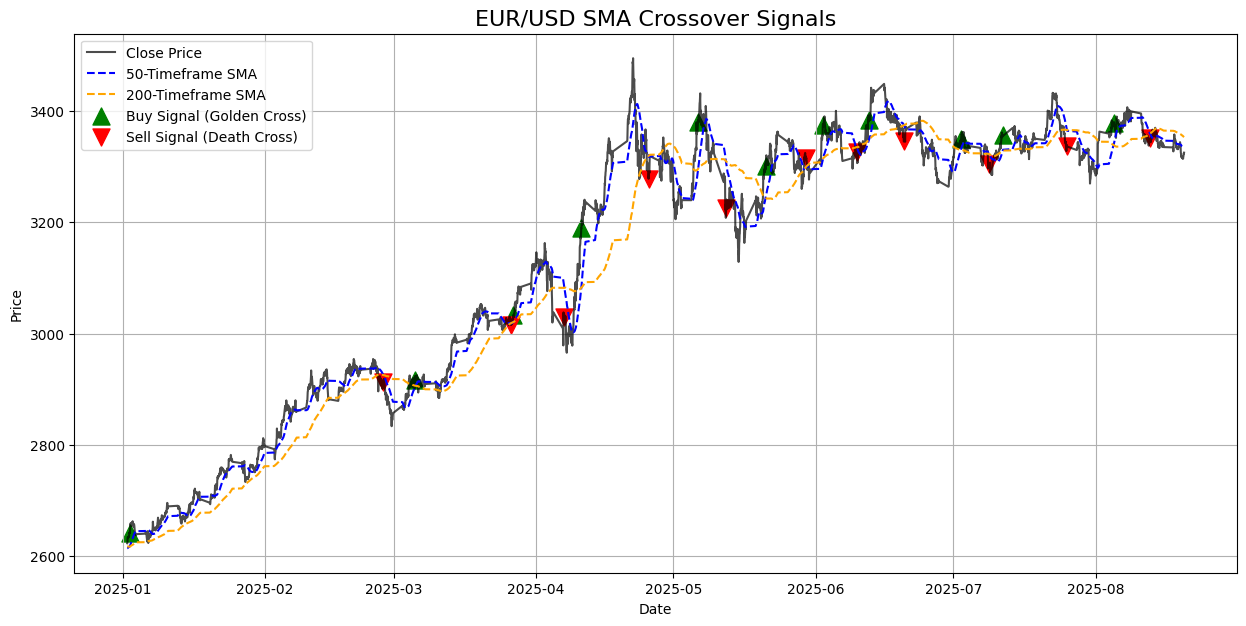

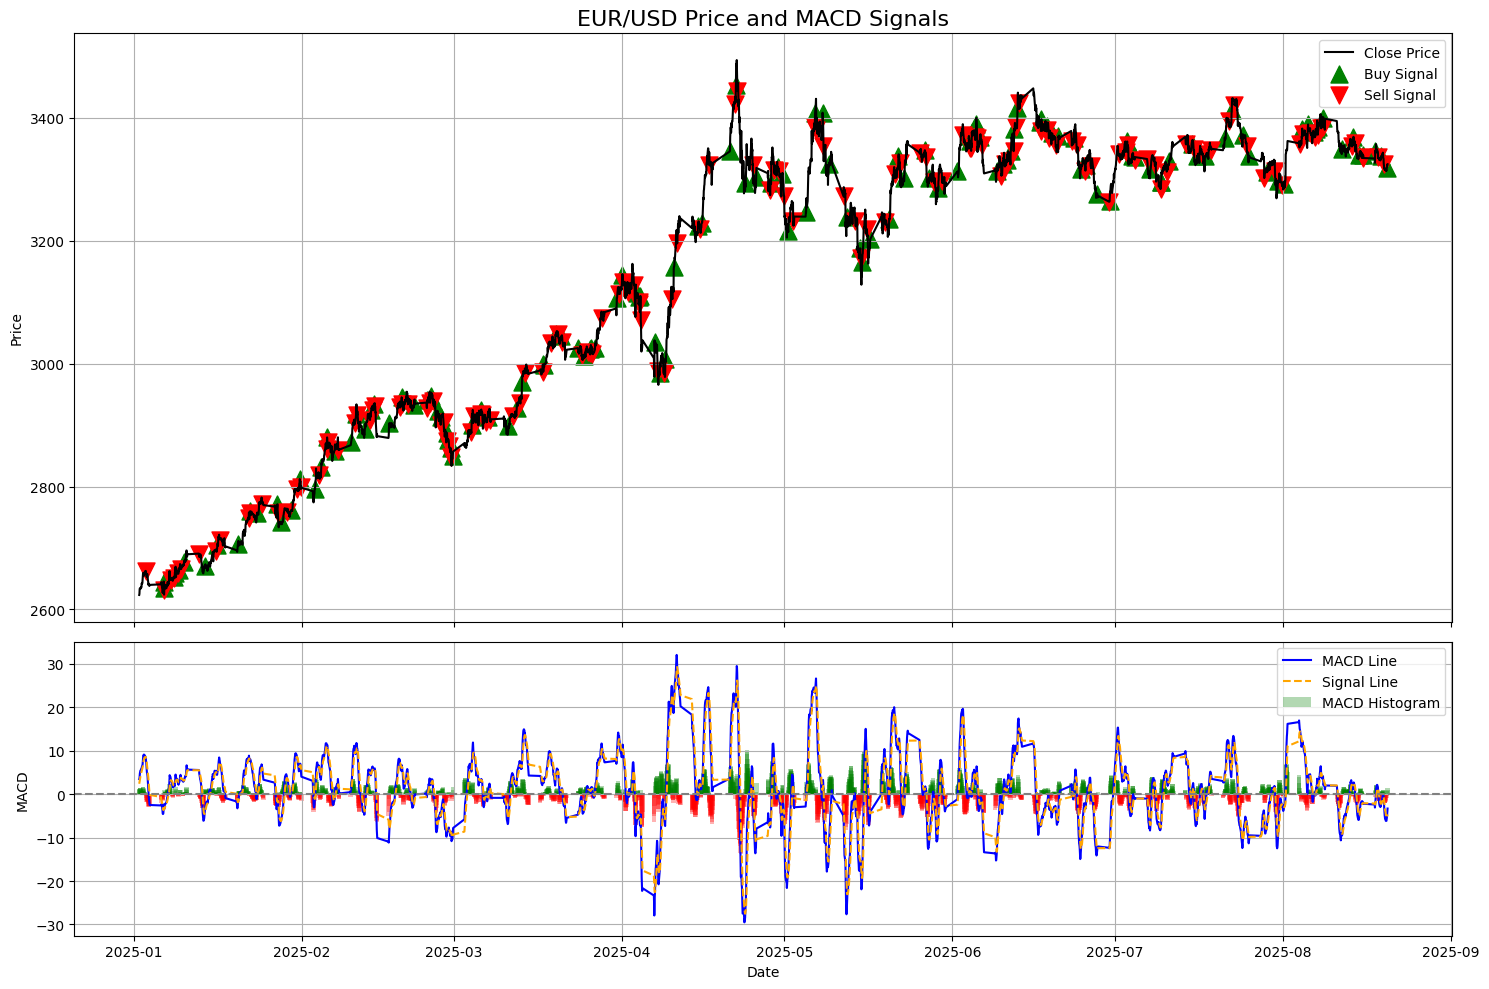

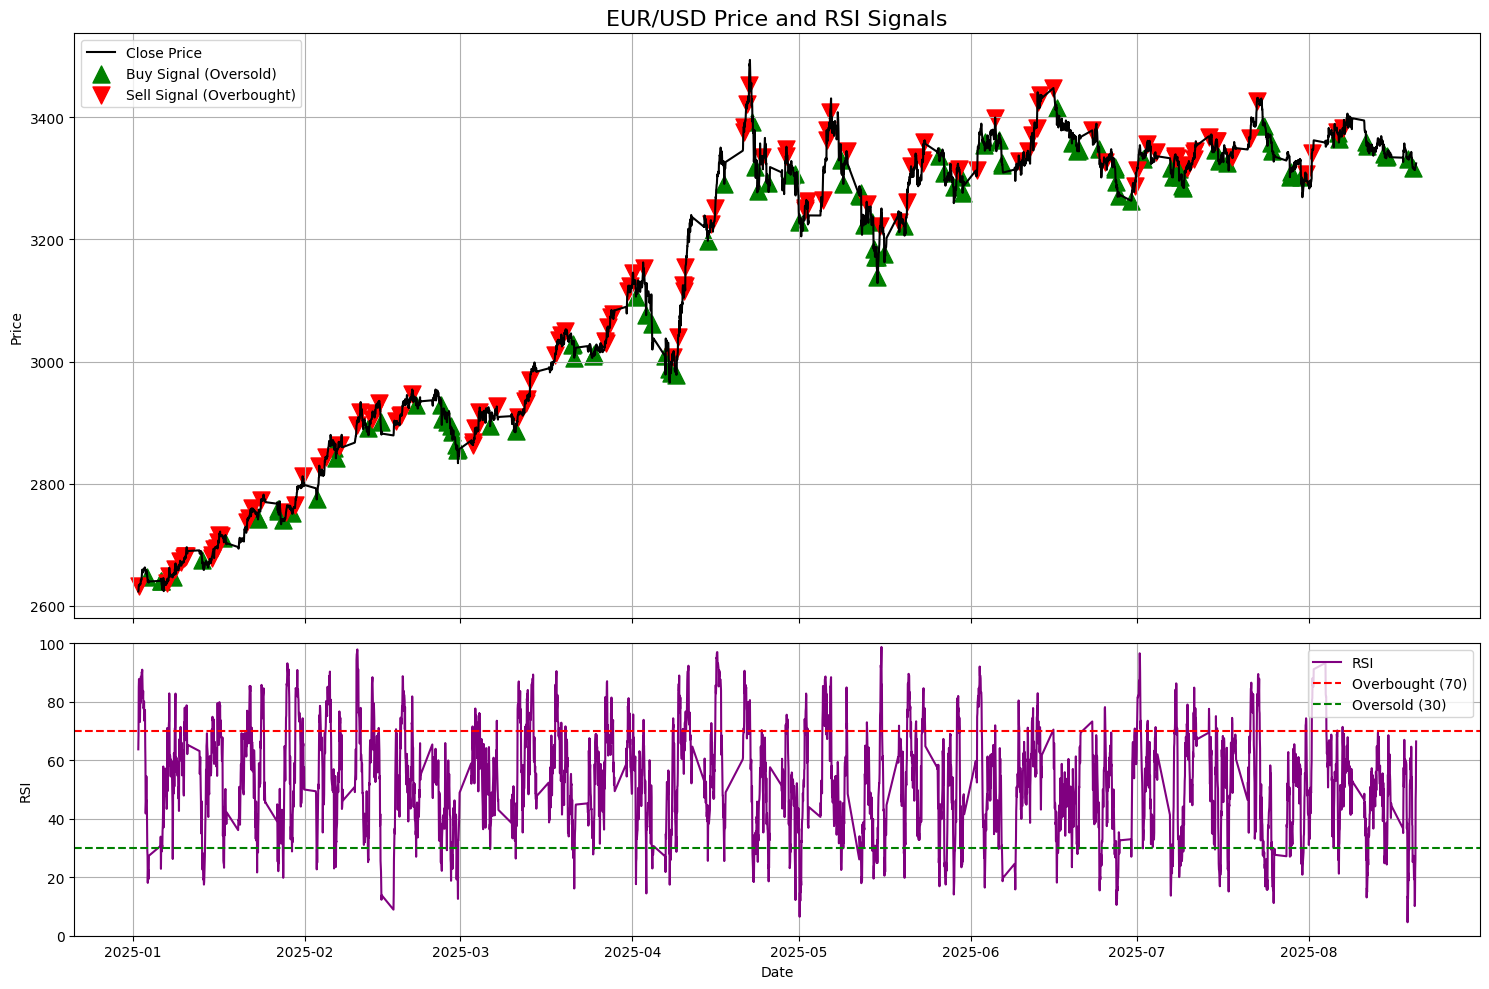

In [21]:
# Apply the signal generation function

# Load the data from the data folder  for forex (/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv) and commodity (/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodity/XAUUSD_D1.csv)

#eurusd_D1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv')
eurusd_h1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_H1.csv')
#eurusd_m15 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_M15.csv')

#xauusd_D1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_D1.csv')
xauusd_h1 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_H1.csv')
#xauusd_m15 = pd.read_csv('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_M15.csv')

#eurusd_D1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv')
eurusd_h1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_H1.csv')
#eurusd_M15_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_M15.csv')

#xauusd_D1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_D1.csv')
xauusd_h1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_H1.csv')
#xauusd_M15_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/commodities/XAUUSD_M15.csv')

# Apply the function to our datasets
eurusd_H1_indicators = add_technical_indicators(eurusd_h1_df)
# xauusd_D1_indicators = add_technical_indicators(xauusd_D1_df) # Can be used for Gold
xauusd_H1_indicators = add_technical_indicators(xauusd_h1_df)

eurusd_H1_signals = generate_trading_signals(eurusd_H1_indicators)
xauusd_H1_signals = generate_trading_signals(xauusd_H1_indicators)

# --- Execute Visualization ---
print("\n--- Visualizing Signals on XAU/USD Data ---")

# 1. Plot SMA Crossover signals for a longer timeframe to see trend changes
plot_sma_crossover_signals(xauusd_H1_signals, start_date="2025-01-01")

# 2. Plot MACD signals for a more recent period to see shorter-term signals
plot_macd_crossover_signals(xauusd_H1_signals, start_date="2025-01-01")

# 3. Plot RSI signals for a recent period
plot_rsi_signals(xauusd_H1_signals, start_date="2025-01-01")

# --- Execute Visualization ---
print("\n--- Visualizing Signals on XAU/USD Data ---")

# 1. Plot SMA Crossover signals for a longer timeframe to see trend changes
plot_sma_crossover_signals(xauusd_H1_signals, start_date="2025-01-01")

# 2. Plot MACD signals for a more recent period to see shorter-term signals
plot_macd_crossover_signals(xauusd_H1_signals, start_date="2025-01-01")

# 3. Plot RSI signals for a recent period
plot_rsi_signals(xauusd_H1_signals, start_date="2025-01-01")